<a href="https://colab.research.google.com/github/rajkhatana/New2/blob/master/Churn_ML_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [0]:
data= pd.read_csv('Churn.csv')

In [0]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [0]:
#dropout customerID becouse it is not usefull for Churn
data=data.drop(['customerID'],axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##Understanding the data

In [0]:
# Checking the data types of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


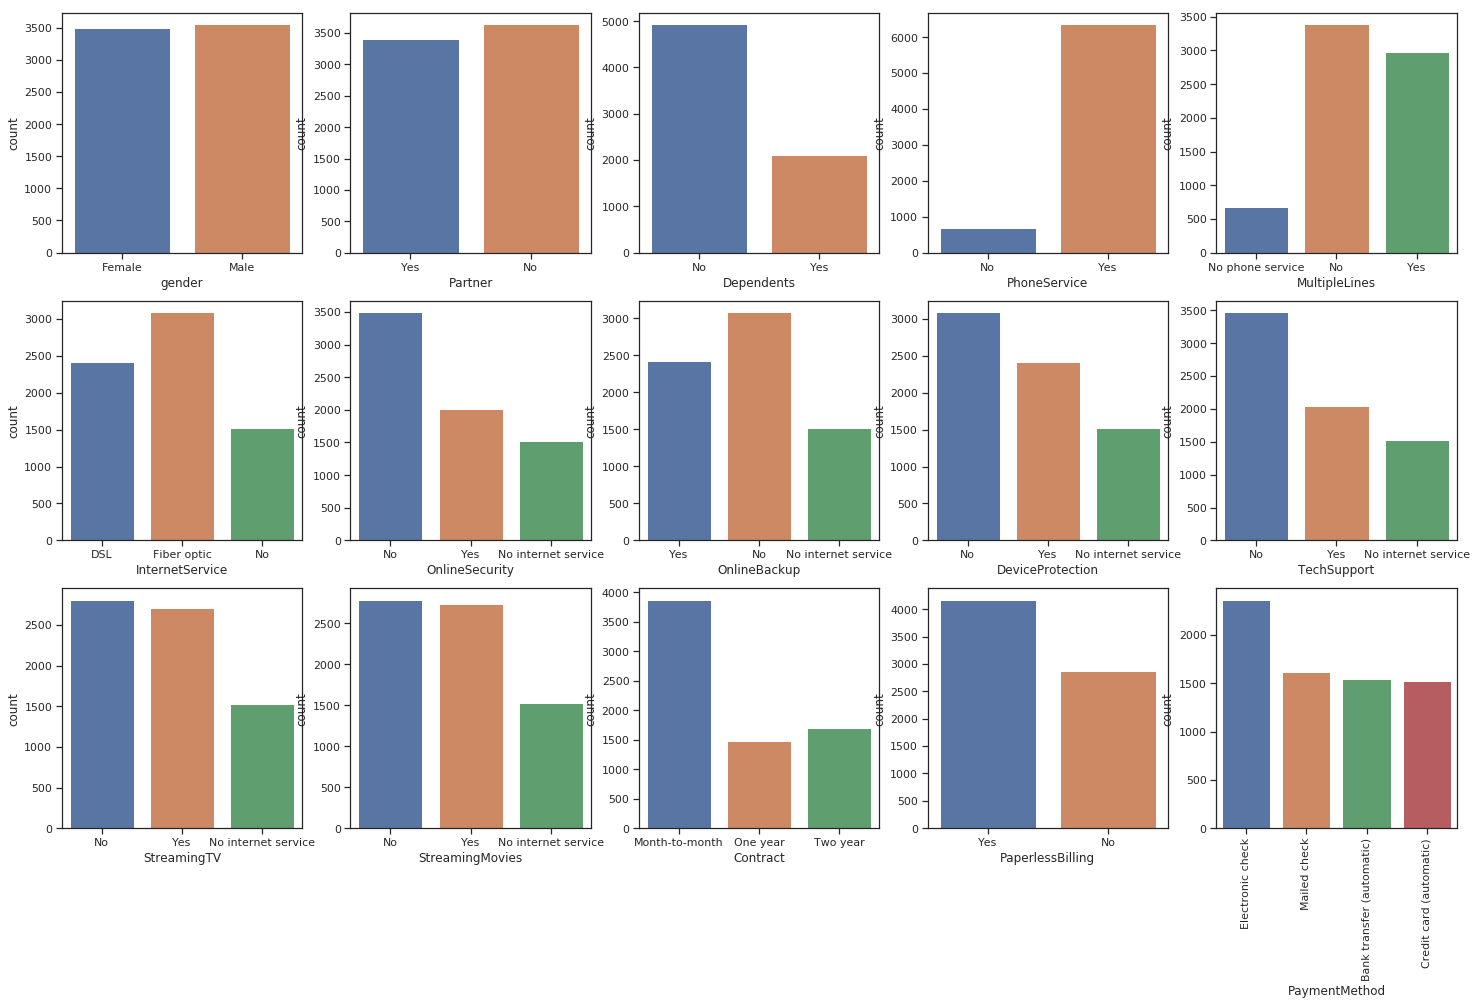

In [0]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
df=data
fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (25,15))
sns.countplot(x = "gender", data = df, ax=axes[0][0])
sns.countplot(x = "Partner", data = df, ax=axes[0][1])
sns.countplot(x = "Dependents", data = df, ax=axes[0][2])
sns.countplot(x = "PhoneService", data = df, ax=axes[0][3])
sns.countplot(x = "MultipleLines", data = df, ax=axes[0][4])
sns.countplot(x = "InternetService", data = df, ax=axes[1][0])
sns.countplot(x = "OnlineSecurity", data = df, ax=axes[1][1])
sns.countplot(x = "OnlineBackup", data = df, ax=axes[1][2])
sns.countplot(x = "DeviceProtection", data = df, ax=axes[1][3])
sns.countplot(x = "TechSupport", data = df, ax=axes[1][4])
sns.countplot(x = "StreamingTV", data = df, ax=axes[2][0])
sns.countplot(x = "StreamingMovies", data = df, ax=axes[2][1])
sns.countplot(x = "Contract", data = df, ax=axes[2][2])
sns.countplot(x = "PaperlessBilling", data = df, ax=axes[2][3])
ax = sns.countplot(x = "PaymentMethod", data = df, ax=axes[2][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

##Data Manipulation

In [0]:
# Converting Total Charges to a numerical data type
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [0]:
data = data.dropna()
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

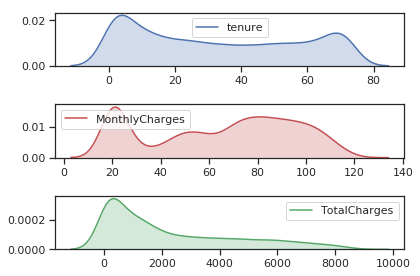

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
sns.kdeplot(data["tenure"], shade=True, color="b",ax = ax1)
sns.kdeplot(data["MonthlyCharges"], shade=True, color="r", ax = ax2)
sns.kdeplot(data["TotalCharges"], shade=True, color="g", ax = ax3)
fig.tight_layout()
plt.show(fig)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [0]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
SeniorCitizen                            7032 non-null int64
tenure                                   7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
gender_Male                              7032 non-null uint8
Partner_Yes                              7032 non-null uint8
Dependents_Yes                           7032 non-null uint8
PhoneService_Yes                         7032 non-null uint8
MultipleLines_No phone service           7032 non-null uint8
MultipleLines_Yes                        7032 non-null uint8
InternetService_Fiber optic              7032 non-null uint8
InternetService_No                       7032 non-null uint8
OnlineSecurity_No internet service       7032 non-null uint8
OnlineSecurity_Yes                       7032 non-null uint8
OnlineBackup_No internet service   

In [0]:
X = data.drop(['Churn_Yes'],axis=1)
Y = data['Churn_Yes']
print(X.shape,'\n',Y.shape)

(7032, 30) 
 (7032,)


In [0]:
X = X.astype('float32')
Y = Y.astype('float32')

In [0]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , test_size =.10 ,random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

##Implement Machine Learning Models

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
y_pred = dtc.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.7088068181818182
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80       514
         1.0       0.46      0.44      0.45       190

    accuracy                           0.71       704
   macro avg       0.63      0.62      0.63       704
weighted avg       0.71      0.71      0.71       704



In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier()
rfc.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = rfc.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.7997159090909091
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       514
         1.0       0.69      0.46      0.56       190

    accuracy                           0.80       704
   macro avg       0.76      0.69      0.71       704
weighted avg       0.79      0.80      0.79       704



In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)
print (metrics.accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.8210227272727273
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       514
         1.0       0.71      0.56      0.63       190

    accuracy                           0.82       704
   macro avg       0.78      0.74      0.76       704
weighted avg       0.81      0.82      0.81       704



#Using Keras

In [0]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

Using TensorFlow backend.


In [0]:
Nx=X_train.shape[1:][0]
Ny=Y_train.shape[1:][0]
print(Nx,Ny)

30 2


In [0]:
from tensorflow.keras.layers import Input, Dense
from keras.models import Sequential

input_layer = Input(shape = X_train.shape[1:])
hidden_layer = Dense(10, activation = 'relu',)(input_layer)
hidden_layer = Dense(10, activation = 'relu',)(hidden_layer)
output_layer = Dense(2, activation = 'sigmoid')(hidden_layer)

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
model = Model(inputs=[input_layer], outputs=[output_layer])
model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 442
Trainable params: 442
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, Y_train, epochs=50)

W0619 17:21:48.649310 139812908099456 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
6328/6328 [==============================] - 1s 98us/sample - loss: 0.6103 - acc: 0.6768
Epoch 2/50
6328/6328 [==============================] - 1s 86us/sample - loss: 0.4508 - acc: 0.7881
Epoch 3/50
6328/6328 [==============================] - 1s 83us/sample - loss: 0.4335 - acc: 0.7936
Epoch 4/50
6328/6328 [==============================] - 1s 87us/sample - loss: 0.4253 - acc: 0.7988
Epoch 5/50
6328/6328 [==============================] - 1s 85us/sample - loss: 0.4206 - acc: 0.7982
Epoch 6/50
6328/6328 [==============================] - 1s 85us/sample - loss: 0.4170 - acc: 0.8025
Epoch 7/50
6328/6328 [==============================] - 1s 83us/sample - loss: 0.4147 - acc: 0.8037
Epoch 8/50
6328/6328 [==============================] - 1s 87us/sample - loss: 0.4128 - acc: 0.8042
Epoch 9/50
6328/6328 [==============================] - 1s 82us/sample - loss: 0.4115 - acc: 0.8048
Epoch 10/50
6328/6328 [==============================] - 1s 85us/sample - loss: 0.4101 - acc: 0.8070

In [0]:
from sklearn.metrics import confusion_matrix
loss, accuracy = model.evaluate(X_test, Y_test,verbose=0)  # Evaluate the model
print('Accuracy :%0.3f'%accuracy)

Accuracy :0.822


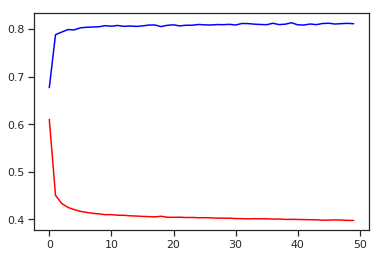

In [0]:
history.history.keys()
import matplotlib.pyplot as plt
plt.plot(range(len(history.history['acc'])), history.history['acc'],c='blue')
plt.plot(range(len(history.history['loss'])), history.history['loss'],c='red')
plt.show()